In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

## Question 10

In [8]:
# Define the graph data structure, allowing accessing nodes with a specific t 
class Graph:
    def __init__(self, MapOfStates):
        # The map of states should have distinct keys (time) and for each time have a list of states
        self.timelist = []
        self.statemap = MapOfStates
        for key in MapOfStates:
            self.timelist.append(key)
        self.timelist.sort()
    def StatesByTime(self, t):
        return self.statemap[t]
    def Time(self):
        return self.timelist
    
    # Using Viterbi algorithm to find shortest path
    def Viterbi(self, DistanceFunc):
        ''' 
        Distance Function requires three inputs: time, last state, next state
        '''
        TimeList = self.Time()
        # initialize the map recording for each (time, state) the minimum distance from beginning and the node before this node
        # This minmap is a map of map, with the key of outer map being time, the key of inner map is the state.
        MinMap = {}
        
        ## Update the minmap for time 1
        
        # record important time and list of states
        CurrentTime = TimeList[1]
        LastTime = TimeList[0]
        CurrentStates = self.StatesByTime(CurrentTime)
        LastStates = self.StatesByTime(LastTime)
        MinMap[CurrentTime] = {}
        for cs in CurrentStates:
            
            min_distance = np.inf
            min_lastState = np.nan
            for ls in LastStates:
                dist = DistanceFunc(CurrentTime, ls, cs)
                if dist < min_distance:
                    min_distance = dist
                    min_lastState = ls
            MinMap[CurrentTime][cs] = (min_distance, min_lastState)
            
            
        ## update the minmap after the time 1
        
        for i in range(2,len(TimeList)):
            # record important time and list of states
            CurrentTime = TimeList[i]
            LastTime = TimeList[i-1]
            CurrentStates = self.StatesByTime(CurrentTime)
            LastStates = self.StatesByTime(LastTime)
            MinMap[CurrentTime] = {}
            # find the min distance and the corresponding last node for each current node 
            for cs in CurrentStates:
                min_distance = np.inf
                min_lastState = np.nan
                for ls in LastStates:
                    # The key recursive formula here
                    dist = DistanceFunc(CurrentTime, ls, cs) + MinMap[LastTime][ls][0]
                    if dist < min_distance:
                        min_distance = dist
                        min_lastState = ls
                MinMap[CurrentTime][cs] = (min_distance, min_lastState)
            
            
            
        ## Find the min distance among all path
        EndMap = MinMap[TimeList[-1]] 
        EndingState = min(EndMap, key = lambda x: EndMap[x][0])
        FinalDist = EndMap[EndingState][0]
        ReversedPath = [(TimeList[-1],EndingState)]
        
        # Iterate to find the reversed path
        state1 = EndingState
        for t in list(reversed(TimeList))[0:-1]:
            state1 = MinMap[t][state1][1]
            ReversedPath.append((t,state1))
        Path = list(reversed(ReversedPath))
        
        # Making the list into a map
        PathMap = {}
        for i in Path:
            PathMap[i[0]] = i[1]
        return FinalDist, PathMap
    
    # Optimal Trading path Algorithm
    def OptimalTradingPath(self, CostFunction, LossFunction, IdealPath):
        ''' Find the Optimal Trading path and the maximised utility '''
        TimeList = self.Time()
        def DistanceFunction(t, ps, cs):
            if t == TimeList[-1]:
                return CostFunction(cs-ps)
            else:
                return LossFunction(IdealPath(t)-cs) + CostFunction(cs-ps)
        # Applying Viterbi algorithm
        minTotalLoss, path = self.Viterbi(DistanceFunction)
        return -minTotalLoss, path

In [9]:
# Load functions
c = lambda x: 2*(x**2 + np.abs(x))
l = lambda x: 1/2*x**2
y = lambda t: 25*np.exp(-(1+t)/8) - 40*np.exp(-(1+t)/4)
# Create the graph
times = np.array(range(1,20))
states = list(np.linspace(-2,6,81))
StatesMap = {}
StatesMap[0] = [0]
for t in times:
    StatesMap[t] = states.copy()
StatesMap[20] = [0]
MyGraph = Graph(StatesMap)
time1 = time.time()
MaxUtility, path = MyGraph.OptimalTradingPath(c,l,y)
time2 = time.time()

print('The maximized utility is %f' % MaxUtility)
print('The optimal path is', path)
print('The time used in the algorithm is: %f seconds' %(time2-time1))

The maximized utility is -34.778633
The optimal path is {1: 0, 2: 0.0, 3: 0.20000000000000018, 4: 0.8000000000000003, 5: 1.5, 6: 2.1000000000000005, 7: 2.6000000000000005, 8: 2.8000000000000007, 9: 2.8000000000000007, 10: 2.8000000000000007, 11: 2.8000000000000007, 12: 2.8000000000000007, 13: 2.8000000000000007, 14: 2.7, 15: 2.6000000000000005, 16: 2.4000000000000004, 17: 2.1000000000000005, 18: 1.8000000000000003, 19: 1.4000000000000004, 20: 0}
The time used in the algorithm is: 1.478046 seconds


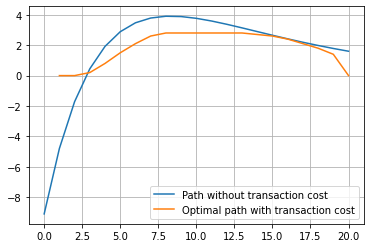

In [10]:
# Plot the result
fig, ax = plt.subplots()
timeRange = np.arange(0,21,1)
ax.plot(timeRange, y(timeRange), label = 'Path without transaction cost')
ax.plot(path.keys(),path.values(), label = 'Optimal path with transaction cost')
ax.legend()
ax.grid()

## Question 11

a)

In [34]:
## Calculate B

# Define State Space
states = set([1,-1])
h = lambda a,b : -0.1*a*b

# Iteratively calculate the V(x)'s
V = {}

# When t = 1

V[1] = {}
V[1][1] = np.exp(-h(-1,1))+np.exp(-h(1,1))
V[1][-1] = np.exp(-h(-1,-1))+np.exp(-h(1,-1))

# When t>1
for t in range(2,101):
    V[t] = {}
    V[t][1] = np.exp(-h(-1,1))*V[t-1][-1]+np.exp(-h(1,1))*V[t-1][1]
    V[t][-1] = np.exp(-h(-1,-1))*V[t-1][-1]+np.exp(-h(1,-1))*V[t-1][1]
B = V[100][1]+V[100][-1]

# Record the V(.) to be used in next subquestion
M = V
print('The result of B is:')
print(B)

The result of B is:
4.1765323833865e+30


In [32]:
## Calculate the expectation
# Iteratively calculate the V(x)'s
V = {}
g = lambda a,b: a*b

# We introduce the V0 term to make the iteration consistent for all terms

V[0] = {}
V[0][1] = 1
V[0][-1] = 1

# Do the summation
Sum = 0
for i in range(1,101):
    for t in range(1,101):
        V[t] = {}
        if t != i:
            V[t][1] = np.exp(-h(-1,1))*V[t-1][-1]+np.exp(-h(1,1))*V[t-1][1]
            V[t][-1] = np.exp(-h(-1,-1))*V[t-1][-1]+np.exp(-h(1,-1))*V[t-1][1]
        # The case where the modification is required
        else:
            V[t][1] = np.exp(-h(-1,1))* g(-1,1) *V[t-1][-1]+np.exp(-h(1,1))* g(1,1)* V[t-1][1]
            V[t][-1] = np.exp(-h(-1,-1)) * g(-1,-1) * V[t-1][-1]+np.exp(-h(1,-1))* g(1,-1) *V[t-1][1]
    Sum += V[100][1]+V[100][-1]
print('The expectation is:')
print(Sum/B)

The expectation is:
9.966799462495576


b)

In [38]:
nRepeats = 10000
Sample = []
V = M
V[0] = {}
V[0][1] = 1
V[0][-1] = 1
def MyRNG(x):
    u = np.random.random()
    if u<x:
        return 1
    else:
        return -1
for i in range(nRepeats):
    Data = {}
    Prob1 = {}
    Prob1[100] = V[100][1]/B
    Data[100] = MyRNG(Prob1[100])
    for t in reversed(range(0, 100)):
        p = (V[t][1]*np.exp(-h(1,Data[t+1])))/(V[t][1]*np.exp(-h(1,Data[t+1])) + V[t][-1]*np.exp(-h(-1,Data[t+1])))
        Data[t] = MyRNG(p)
        Prob1[t] = p
    Sample.append(Data)
    
def G(Data):
    Sum = 0
    for i in range(1,101):
        Sum += Data[i-1]*Data[i]
    return Sum
Total = 0
for Data in Sample:
    Total += G(Data)
print(Total/nRepeats)

9.9564
